# Optimisasi Efisiensi Operasional Rute Bus Transjakarta Melalui Analisis Data  
**Penulis:** Brian Samuel Matthew (JCDSBSDAM29)


## 1. Business Understanding

### 1.1 Konteks dan Latar Belakang  

Transjakarta merupakan sistem transportasi **Bus Rapid Transit (BRT)** terbesar di Asia Tenggara yang melayani jutaan penumpang setiap harinya. Dengan jumlah koridor yang terus bertambah dan frekuensi keberangkatan yang tinggi, efisiensi operasional menjadi faktor penting dalam menjaga keandalan layanan dan mengontrol biaya operasional.

Dalam praktiknya, masih sering ditemukan ketidakseimbangan antara jumlah penumpang, waktu tempuh, dan alokasi armada pada masing-masing koridor. Beberapa koridor mengalami kepadatan tinggi dan waktu tempuh yang lebih lama, sementara koridor lain justru relatif sepi. Ketidakefisienan ini dapat berdampak pada meningkatnya biaya bahan bakar, penurunan kepuasan pengguna, serta menurunnya keandalan jadwal perjalanan.

Dataset yang digunakan dalam proyek ini berisi catatan transaksi penumpang (*tap-in* dan *tap-out*) yang mencakup informasi waktu, koridor, halte, serta karakteristik pengguna. Melalui analisis terhadap data tersebut, diharapkan dapat diperoleh pemahaman lebih mendalam mengenai pola perjalanan dan efisiensi operasional setiap koridor Transjakarta.

---

### 1.2 Permasalahan Utama  

Permasalahan utama yang hendak dianalisis adalah:  

> **Bagaimana cara mengidentifikasi koridor Transjakarta yang menunjukkan indikasi inefisiensi operasional berdasarkan waktu tempuh, variasi durasi perjalanan, dan pola aktivitas halte?**

Masalah ini penting karena efisiensi operasional secara langsung mempengaruhi:
- Kinerja dan ketepatan waktu layanan.  
- Ketersediaan armada pada jam sibuk.  
- Tingkat kepuasan dan kenyamanan penumpang.  
- Biaya operasional dan penggunaan sumber daya.

---

### 1.3 Stakeholder  

Analisis ini relevan bagi beberapa pihak utama, antara lain:  
- **Manajemen Operasional Transjakarta**, untuk pengambilan keputusan terkait jadwal dan alokasi bus.  
- **Pemerintah Provinsi DKI Jakarta**, sebagai regulator transportasi publik.    

---

### 1.4 Tujuan Analisis  

Analisis ini bertujuan untuk:  
1. Mengukur durasi rata-rata dan variasi waktu perjalanan per koridor.  
2. Mengidentifikasi koridor dengan durasi tempuh tinggi dan variabilitas besar (indikasi inefisiensi).  
3. Menganalisis tingkat aktivitas halte untuk menemukan halte dengan penggunaan rendah (*underutilized stops*).  
4. Mempelajari pola waktu keberangkatan (jam sibuk vs non-sibuk) dan hubungannya dengan efisiensi perjalanan.  
5. Memberikan rekomendasi berbasis data untuk peningkatan efisiensi operasional Transjakarta.  

---

### 1.5 Pendekatan Analitis  

Pendekatan yang digunakan dalam analisis ini meliputi:  
- **Perhitungan durasi perjalanan** berdasarkan selisih waktu antara *tap-in* dan *tap-out*.  
- **Analisis deskriptif dan visualisasi** distribusi durasi perjalanan per koridor.  
- **Pengelompokan halte** berdasarkan tingkat aktivitas penumpang.  
- **Perbandingan performa** antar koridor pada jam sibuk dan non-sibuk.  

---

### 1.6 Batasan Analisis  

- Data yang digunakan merupakan **snapshot transaksi pada April 2023 (dummy)** dan belum mencakup seluruh periode operasional.  
- Analisis difokuskan pada data transaksi penumpang (*tap data*), tanpa memasukkan variabel eksternal seperti **kondisi lalu lintas, cuaca, atau jadwal armada**.  
- Hasil analisis bersifat deskriptif eksploratif, dan digunakan sebagai dasar rekomendasi awal untuk pengambilan keputusan berbasis data.

---

### 1.7 Ringkasan  

Melalui analisis ini, diharapkan diperoleh wawasan mengenai pola perjalanan penumpang Transjakarta serta koridor yang berpotensi mengalami inefisiensi. Hasilnya dapat menjadi dasar pengambilan keputusan strategis dalam pengaturan jadwal, optimisasi armada, serta peningkatan pengalaman penumpang.


## 2. Data Understanding

Dataset yang digunakan merupakan file [Transjakarta.csv](https://www.kaggle.com/datasets/dikisahkan/transjakarta-transportation-transaction) yang berisi catatan transaksi perjalanan penumpang. Setiap baris mewakili satu perjalanan (trip) yang direkam oleh sistem tap-in dan tap-out kartu pembayaran elektronik.

**Kolom penting (ringkasan):**  
- `transID`, `payCardID`, `payCardBank`, `payCardName`  
- `payCardSex`, `payCardBirthDate`  
- `corridorID`, `corridorName`  
- `tapInStops`, `tapInStopsName`, `tapInStopsLat`, `tapInStopsLon`  
- `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`  
- `tapInTime`, `tapOutTime`  
- `payAmount`

Catatan: Beberapa kolom (terutama `tapOutTime` dan `tapOutStops`) memiliki proporsi nilai kosong yang signifikan, yang kemungkinan merepresentasikan penumpang yang tidak melakukan tap-out atau kegagalan pencatatan.


## 3. Data Loading dan Pemeriksaan Awal

Langkah ini memuat data ke lingkungan Python dan menampilkan pemeriksaan awal (bentuk data, tipe kolom, dan ringkasan missing).


In [2]:
# Memuat data dan pemeriksaan awal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "Transjakarta.csv"
df = pd.read_csv(file_path)

print("Jumlah baris dan kolom:", df.shape)
display(df.head())
display(df.info())
display(df.isna().sum().sort_values(ascending=False).head(20))


Jumlah baris dan kolom: (37900, 22)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

None

tapOutStops         2289
corridorName        1930
tapOutStopsLat      1344
stopEndSeq          1344
tapOutTime          1344
tapOutStopsLon      1344
tapOutStopsName     1344
corridorID          1257
tapInStops          1213
payAmount           1007
payCardID              0
transID                0
payCardName            0
payCardBank            0
payCardBirthDate       0
payCardSex             0
stopStartSeq           0
tapInStopsName         0
direction              0
tapInStopsLon          0
dtype: int64

## 4. Data Cleaning

Tahap pembersihan data dilakukan untuk memastikan kualitas data yang digunakan dalam analisis tetap terjaga serta setiap perubahan yang dilakukan dapat ditelusuri kembali. Proses ini bertujuan agar hasil analisis dapat diinterpretasikan dengan benar dan tidak bias akibat kesalahan data.

Langkah-langkah pembersihan yang dilakukan antara lain:

1. **Konversi kolom waktu (`tapInTime` dan `tapOutTime`) ke format `datetime`**  
   Kedua kolom ini berisi waktu ketika penumpang melakukan *tap-in* dan *tap-out*. Agar bisa menghitung durasi perjalanan, nilai waktu perlu diubah ke format `datetime`.  
   Fungsi `pd.to_datetime(..., errors='coerce')` digunakan supaya nilai yang tidak sesuai format tidak menyebabkan error, melainkan diubah menjadi `NaT` (null time).

2. **Penanganan kolom `corridorName` dan `corridorID`**  
   Kolom `corridorName` berisi nama rute, sedangkan `corridorID` merupakan identitas numeriknya. Beberapa data tidak memiliki nilai pada `corridorName`, sehingga untuk menghindari hilangnya baris data, nilai `corridorID` digunakan sebagai pengganti.  
   Jika kedua kolom kosong, maka nilainya diisi dengan label `'Unknown Corridor'`. Selain itu, dibuat juga kolom tambahan bernama `corridor_imputed` untuk menandai baris data yang mengalami pengisian otomatis (imputasi).

3. **Penanganan kolom `tapOutStops` dan `tapOutStopsName`**  
   Tidak semua penumpang melakukan *tap-out*, sehingga kolom ini memiliki banyak nilai kosong. Karena nilai kosong tersebut bersifat informatif (menunjukkan penumpang tidak tap-out), data tidak diisi dengan nilai buatan. Sebagai gantinya, ditambahkan kolom tampilan (`tapOutStops_display`) yang berisi teks `"Not Recorded"` agar tetap bisa dibaca saat ditampilkan di visualisasi.

4. **Pembuatan kolom indikator kelengkapan data (`has_tapout`, `tapout_stop_recorded`)**  
   Dua kolom tambahan ini dibuat untuk menandai apakah suatu perjalanan memiliki data *tap-out* yang lengkap. Dengan adanya flag ini, analisis selanjutnya dapat difokuskan hanya pada perjalanan yang valid.

5. **Pembuatan kolom `isFreeRide` dan `payCardAge`**  
   Kolom `isFreeRide` menandai perjalanan yang tidak dikenakan biaya, sedangkan `payCardAge` digunakan untuk menghitung umur penumpang berdasarkan tahun lahir (`payCardBirthDate`). Informasi ini penting dalam analisis demografis serta dapat membantu dalam memahami perilaku pengguna berdasarkan kelompok usia.



In [3]:
# Data cleaning: konversi waktu, pembuatan kolom display, dan flag audit
df_clean = df.copy()

# 1) Konversi ke datetime
df_clean['tapInTime'] = pd.to_datetime(df_clean['tapInTime'], errors='coerce')
df_clean['tapOutTime'] = pd.to_datetime(df_clean['tapOutTime'], errors='coerce')

# 2) corridor_display: prioritas corridorName -> corridorID -> 'Unknown Corridor'
df_clean['corridor_display'] = df_clean['corridorName'].copy()
mask = df_clean['corridor_display'].isna()
df_clean.loc[mask, 'corridor_display'] = df_clean.loc[mask, 'corridorID']
df_clean['corridor_display'] = df_clean['corridor_display'].fillna('Unknown Corridor')

# Flag jika corridor diimputasi
df_clean['corridor_imputed'] = df_clean['corridorName'].isna() & df_clean['corridor_display'].notna()

# 3) tapOutStops display untuk presentasi; tetap simpan NaN untuk analisis
df_clean['tapOutStops_display'] = df_clean['tapOutStops'].fillna('Not Recorded')
df_clean['tapOutStopsName_display'] = df_clean['tapOutStopsName'].fillna('Not Recorded')

# 4) flag untuk tap-out
df_clean['has_tapout'] = df_clean['tapOutTime'].notna()
df_clean['tapout_stop_recorded'] = df_clean['tapOutStops'].notna()

# 5) isFreeRide dan usia
df_clean['isFreeRide'] = (df_clean['payAmount'].isna()) | (df_clean['payAmount'] == 0)
current_year = 2025
df_clean['payCardAge'] = current_year - df_clean['payCardBirthDate']

# 6) standarisasi jenis kelamin
df_clean['payCardSex'] = df_clean['payCardSex'].astype(str).str.upper().replace({'MALE':'M','FEMALE':'F'})

# Tampilkan ringkasan awal
display(df_clean[['corridorName','corridorID','corridor_display','corridor_imputed']].head(8))
display(df_clean[['tapOutStops','tapOutStops_display','has_tapout','tapout_stop_recorded']].head(8))
display(df_clean[['payAmount','isFreeRide','payCardBirthDate','payCardAge','payCardSex']].head(8))


,corridorName,corridorID,corridor_display,corridor_imputed
0,Matraman Baru - Ancol,5,Matraman Baru - Ancol,False
1,Stasiun Tebet - Karet via Patra Kuningan,6C,Stasiun Tebet - Karet via Patra Kuningan,False
2,Pantai Maju - Kota,R1A,Pantai Maju - Kota,False
3,Pulo Gebang - Pulo Gadung 2 via PIK,11D,Pulo Gebang - Pulo Gadung 2 via PIK,False
4,Tanjung Priok - Pluit,12,Tanjung Priok - Pluit,False
5,Cibubur - Balai Kota,1T,Cibubur - Balai Kota,False
6,Kalibata - Kuningan,JAK.18,Kalibata - Kuningan,False
7,NaN,NaN,Unknown Corridor,True


,tapOutStops,tapOutStops_display,has_tapout,tapout_stop_recorded
0,P00253,P00253,True,True
1,B03307P,B03307P,True,True
2,B04962P,B04962P,True,True
3,B03090P,B03090P,True,True
4,P00098,P00098,True,True
5,B00694P,B00694P,True,True
6,NaN,Not Recorded,False,False
7,B00899P,B00899P,True,True


,payAmount,isFreeRide,payCardBirthDate,payCardAge,payCardSex
0,3500.0,False,2008,17,M
1,3500.0,False,1997,28,F
2,3500.0,False,1992,33,F
3,3500.0,False,1978,47,F
4,3500.0,False,1982,43,M
5,20000.0,False,1993,32,F
6,0.0,True,1974,51,M
7,0.0,True,1991,34,F


### 4.1 Analisis Kelengkapan Data (Deskriptif)

Setelah pembersihan awal, langkah berikutnya adalah mengukur seberapa besar proporsi data yang hilang pada kolom penting. Informasi ini memengaruhi cakupan analisis (mis. jumlah perjalanan yang dapat dihitung durasinya).


,Kolom,Proporsi_Missing,Proporsi_Persen
0,corridorName,0.050923,5.09
1,corridorID,0.033166,3.32
2,tapOutTime,0.035462,3.55
3,tapOutStops,0.060396,6.04


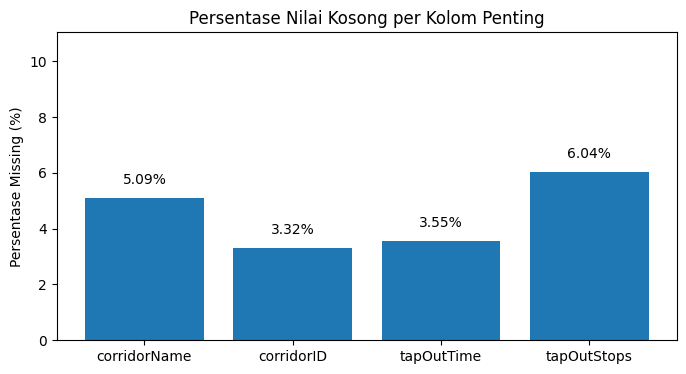

In [4]:
# Analisis missing values untuk kolom penting
cols_of_interest = ['corridorName','corridorID','tapOutTime','tapOutStops']
missing_summary = df_clean[cols_of_interest].isna().mean().reset_index()
missing_summary.columns = ['Kolom','Proporsi_Missing']
missing_summary['Proporsi_Persen'] = (missing_summary['Proporsi_Missing'] * 100).round(2)

# Tampilkan tabel dan grafik
display(missing_summary)
plt.figure(figsize=(8,4))
plt.bar(missing_summary['Kolom'], missing_summary['Proporsi_Persen'])
plt.ylabel('Persentase Missing (%)')
plt.title('Persentase Nilai Kosong per Kolom Penting')
plt.ylim(0, missing_summary['Proporsi_Persen'].max() + 5)
for i, v in enumerate(missing_summary['Proporsi_Persen']):
    plt.text(i, v + 0.5, f"{v}%", ha='center')
plt.show()


**Interpretasi:**  
- Jika proporsi `tapOutTime` yang hilang signifikan, maka analisis durasi hanya dapat dilakukan pada subset data yang valid (`has_tapout == True`).  
- Kolom `corridorName` yang hilang tetapi terisi `corridor_display` (dari `corridorID`) memungkinkan agregasi per-koridor, namun harus dicantumkan persentase imputasi dalam laporan.


## 5. Feature Engineering

Tahap ini dilakukan untuk menyiapkan fitur-fitur tambahan yang dibutuhkan dalam analisis efisiensi perjalanan. Beberapa kolom baru dibuat berdasarkan kolom waktu, rute, dan data pengguna agar analisis bisa dilakukan secara lebih mendalam.

Langkah-langkah yang dilakukan adalah sebagai berikut:

1. **Durasi perjalanan (`trip_duration_min`)**  
   Kolom ini menunjukkan lama perjalanan penumpang dari *tap-in* hingga *tap-out* dalam satuan menit. Nilai diperoleh dari selisih antara `tapOutTime` dan `tapInTime`. Baris dengan hasil negatif (misalnya akibat kesalahan pencatatan waktu) diubah menjadi `NaN` agar tidak menimbulkan bias.

2. **Informasi waktu keberangkatan (`tapIn_hour` dan `tapIn_weekday`)**  
   Kedua kolom ini dibuat untuk melihat pola perilaku penumpang berdasarkan jam dan hari perjalanan. `tapIn_hour` diambil dari jam pada kolom `tapInTime`, sementara `tapIn_weekday` menunjukkan hari dalam format angka (0 untuk Senin, 6 untuk Minggu).

3. **Indikator jam sibuk (`is_peak`)**  
   Sebuah kolom biner yang menandai apakah perjalanan dilakukan pada jam sibuk (06:00–09:00 atau 16:00–19:00). Kolom ini penting untuk membedakan pola perjalanan antara waktu sibuk dan waktu normal.

4. **Kelengkapan perjalanan (`valid_trip`)**  
   Kolom ini bernilai `True` jika perjalanan memiliki *tap-in* dan *tap-out* lengkap serta durasi valid. Dengan adanya kolom ini, analisis efisiensi hanya dilakukan pada perjalanan yang benar-benar tercatat dengan lengkap.

Fitur-fitur ini menjadi dasar dalam melakukan analisis efisiensi rute, pola waktu perjalanan, serta karakteristik pengguna Transjakarta pada tahap berikutnya.


In [5]:
# Feature engineering
df_clean['trip_duration_min'] = (df_clean['tapOutTime'] - df_clean['tapInTime']).dt.total_seconds() / 60
df_clean.loc[df_clean['trip_duration_min'] < 0, 'trip_duration_min'] = np.nan

df_clean['tapIn_hour'] = df_clean['tapInTime'].dt.hour
df_clean['tapIn_weekday'] = df_clean['tapInTime'].dt.dayofweek

def is_peak(hour):
    return ((6 <= hour <= 9) or (16 <= hour <= 19))

df_clean['is_peak'] = df_clean['tapIn_hour'].apply(lambda h: is_peak(h) if pd.notnull(h) else False)
df_clean['valid_trip'] = df_clean['has_tapout'] & df_clean['trip_duration_min'].notna()

display(df_clean[['trip_duration_min','tapIn_hour','is_peak','valid_trip']].describe())


,trip_duration_min,tapIn_hour
count,36556.000000,37900.000000
mean,72.125424,12.519129
std,28.072912,5.717353
min,15.000000,5.000000
25%,51.133333,7.000000
50%,71.833333,13.000000
75%,95.800000,17.000000
max,179.050000,21.000000


## 6. Exploratory Data Analysis (EDA)

Analisis eksploratif dilakukan untuk memahami karakteristik data secara menyeluruh sebelum menarik kesimpulan atau membuat model prediktif. Fokus utama analisis ini adalah mengamati durasi perjalanan, perbandingan antar koridor, aktivitas halte, serta pola waktu keberangkatan.


### 6.1 Analisis Distribusi Durasi Perjalanan

Langkah pertama adalah melihat distribusi lama perjalanan penumpang. Tujuannya adalah untuk memahami rentang waktu tempuh rata-rata dan mengidentifikasi adanya perjalanan dengan durasi ekstrem (*outlier*).

Berdasarkan hasil visualisasi histogram, terlihat bahwa sebagian besar perjalanan berlangsung antara **40 hingga 80 menit**, dengan puncak frekuensi (modus) di kisaran **55–60 menit**. Hampir tidak ada perjalanan dengan durasi di bawah 15 menit, yang menunjukkan bahwa sebagian besar perjalanan Transjakarta termasuk kategori menengah hingga panjang.

Distribusi terlihat sedikit condong ke kanan (*right-skewed*), menandakan bahwa ada sebagian kecil perjalanan berdurasi panjang — kemungkinan karena kondisi lalu lintas padat, waktu tunggu yang lama di halte, atau penumpang yang tidak segera melakukan *tap-out* setelah tiba di tujuan.

Secara keseluruhan, pola ini menunjukkan bahwa waktu tempuh rata-rata perjalanan Transjakarta berada di sekitar **satu jam**, yang masih tergolong wajar mengingat karakteristik rute-rute utama yang melintasi area perkotaan padat.


Jumlah perjalanan dengan durasi valid: 36556
Rata-rata durasi (menit): 72.13
Median durasi (menit): 71.83


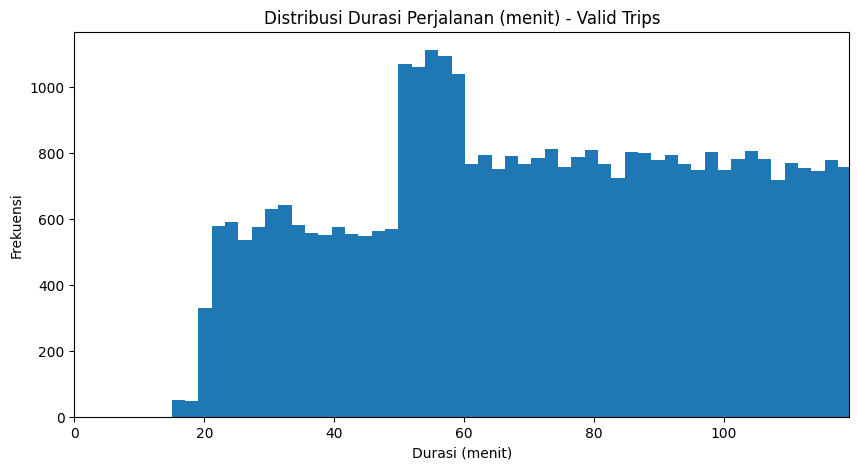

95th percentile durasi: 115.37


,corridor_display,tapInTime,tapOutTime,trip_duration_min
311,BKN - Blok M,2023-04-03 16:37:22,2023-04-03 18:36:21,118.983333
327,Rusun Flamboyan - Cengkareng,2023-04-03 17:03:07,2023-04-03 19:00:29,117.366667
329,Blok M - Kota,2023-04-03 16:21:59,2023-04-03 18:17:42,115.716667
337,Harmoni - Jakarta International Stadium,2023-04-03 16:47:21,2023-04-03 18:44:46,117.416667
349,Ciledug - Tendean,2023-04-03 16:17:03,2023-04-03 18:12:58,115.916667
359,Bulak Turi - Tanjung Priok,2023-04-03 17:00:07,2023-04-03 18:58:18,118.183333
375,Jakarta International Stadium - Senen,2023-04-03 16:41:47,2023-04-03 18:39:47,118.000000
382,Summarecon Bekasi - BNN,2023-04-03 16:56:06,2023-04-03 18:54:11,118.083333
383,Terminal Kalideres - Terminal Muara Angke,2023-04-03 17:45:30,2023-04-03 19:41:59,116.483333
384,Cililitan - Condet via Kayu Manis,2023-04-03 17:08:50,2023-04-03 19:05:14,116.400000


In [6]:
# Distribusi durasi perjalanan (hanya valid trips)
dur = df_clean.loc[df_clean['valid_trip'], 'trip_duration_min'].dropna()
print("Jumlah perjalanan dengan durasi valid:", len(dur))
print("Rata-rata durasi (menit):", round(dur.mean(),2))
print("Median durasi (menit):", round(dur.median(),2))

plt.figure(figsize=(10,5))
plt.hist(dur, bins=80)
plt.title("Distribusi Durasi Perjalanan (menit) - Valid Trips")
plt.xlabel("Durasi (menit)")
plt.ylabel("Frekuensi")
plt.xlim(0, dur.quantile(0.99))
plt.show()

# Identifikasi outlier ( > 95th percentile )
q95 = dur.quantile(0.95)
print("95th percentile durasi:", round(q95,2))
display(df_clean.loc[df_clean['trip_duration_min'] > q95, ['corridor_display','tapInTime','tapOutTime','trip_duration_min']].head(10))


### 6.2 Analisis Efisiensi Antar Koridor

Analisis berikutnya dilakukan untuk melihat perbedaan durasi rata-rata antar koridor Transjakarta. Dengan menghitung nilai rata-rata, median, dan variasi durasi, kita bisa menilai koridor mana yang beroperasi paling efisien.

Hasilnya menunjukkan bahwa beberapa koridor memiliki durasi perjalanan yang konsisten, sementara koridor lainnya menunjukkan variabilitas tinggi.  
Koridor dengan **rata-rata durasi tinggi dan simpangan baku besar** dapat menjadi indikator potensi inefisiensi — misalnya karena jalur terlalu panjang, banyak pemberhentian, atau kemacetan di segmen tertentu.

,corridor_display,trips,avg_duration,median_duration,std_duration
278,M8,1,117.300000,117.300000,NaN
75,7E,1,117.116667,117.116667,NaN
85,8M,1,115.733333,115.733333,NaN
167,JAK.12,1,111.866667,111.866667,NaN
153,JAK.04,2,110.500000,110.500000,0.966379
52,4E,1,108.266667,108.266667,NaN
59,5N,1,106.266667,106.266667,NaN
211,JAK.60,5,103.486667,101.316667,7.217190
15,12B,1,102.716667,102.716667,NaN
270,M12,3,101.950000,116.350000,26.456841


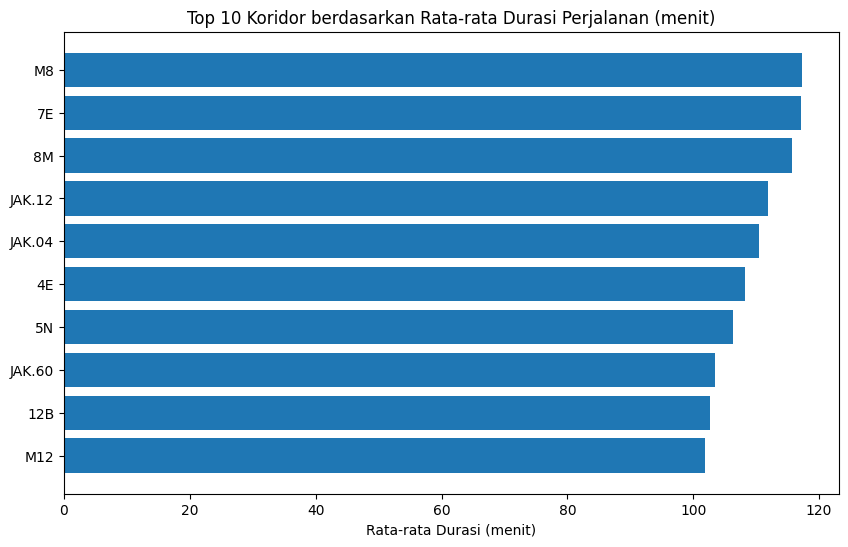

In [7]:
# Statistika per koridor (hanya valid trips)
corridor_stats = (
    df_clean.loc[df_clean['valid_trip']]
    .groupby('corridor_display')
    .agg(trips=('transID','count'),
         avg_duration=('trip_duration_min','mean'),
         median_duration=('trip_duration_min','median'),
         std_duration=('trip_duration_min','std'))
    .reset_index()
).sort_values(by='avg_duration', ascending=False)

display(corridor_stats.head(15))

# Visualisasi top 10 koridor dengan avg duration tertinggi
top10 = corridor_stats.head(10)
plt.figure(figsize=(10,6))
plt.barh(top10['corridor_display'][::-1], top10['avg_duration'][::-1])
plt.title("Top 10 Koridor berdasarkan Rata-rata Durasi Perjalanan (menit)")
plt.xlabel("Rata-rata Durasi (menit)")
plt.show()


### 6.3 Analisis Aktivitas Halte

Bagian ini bertujuan untuk mengetahui halte mana yang paling sering digunakan penumpang. Data dihitung berdasarkan frekuensi *tap-in* dan *tap-out*.

Hasil analisis menunjukkan bahwa halte-halte di area pusat kota seperti **Dukuh Atas, Harmoni, dan CSW** memiliki jumlah aktivitas tertinggi, sedangkan halte di pinggiran kota cenderung memiliki aktivitas rendah.  
Halte dengan tingkat penggunaan sangat rendah dapat menjadi kandidat evaluasi penataan ulang atau penggabungan untuk meningkatkan efisiensi operasional.


In [8]:
# Stop utilization (tap-in dan tap-out counts)
tapin_counts = df_clean['tapInStops'].value_counts().rename_axis('stop').reset_index(name='tapin_count')
tapout_counts = df_clean['tapOutStops'].value_counts().rename_axis('stop').reset_index(name='tapout_count')
stop_counts = tapin_counts.merge(tapout_counts, on='stop', how='outer').fillna(0)
stop_counts['total_activity'] = stop_counts['tapin_count'] + stop_counts['tapout_count']
stop_counts = stop_counts.sort_values(by='total_activity', ascending=False)

display(stop_counts.head(15))
display(stop_counts.tail(15))

# Jika tersedia, tambahkan nama stop untuk readability
if 'tapInStopsName' in df_clean.columns:
    stop_names = df_clean[['tapInStops','tapInStopsName']].drop_duplicates().rename(columns={'tapInStops':'stop','tapInStopsName':'stopName'})
    stop_counts = stop_counts.merge(stop_names, on='stop', how='left')
    display(stop_counts.head(15))


,stop,tapin_count,tapout_count,total_activity
3487,P00170,236.0,255.0,491.0
3344,P00016,170.0,306.0,476.0
3599,P00297,151.0,107.0,258.0
150,B00248P,130.0,125.0,255.0
3567,P00254,122.0,127.0,249.0
3433,P00112,81.0,158.0,239.0
3486,P00169,127.0,110.0,237.0
1738,B03277P,122.0,111.0,233.0
3389,P00064,200.0,31.0,231.0
3456,P00137,57.0,161.0,218.0


,stop,tapin_count,tapout_count,total_activity
2592,B05204P,0.0,1.0,1.0
2587,B05183P,1.0,0.0,1.0
2581,B05172P,0.0,1.0,1.0
2580,B05170P,1.0,0.0,1.0
2578,B05167P,0.0,1.0,1.0
2577,B05162P,0.0,1.0,1.0
1104,B02150P,0.0,1.0,1.0
1097,B02134P,1.0,0.0,1.0
1096,B02133P,0.0,1.0,1.0
1094,B02128P,0.0,1.0,1.0


,stop,tapin_count,tapout_count,total_activity,stopName
0,P00170,236.0,255.0,491.0,Penjaringan
1,P00016,170.0,306.0,476.0,BKN
2,P00297,151.0,107.0,258.0,BNN LRT
3,B00248P,130.0,125.0,255.0,Cibubur Junction
4,P00254,122.0,127.0,249.0,Tendean
5,P00112,81.0,158.0,239.0,Kejaksaan Agung
6,P00169,127.0,110.0,237.0,Penggilingan
7,B03277P,122.0,111.0,233.0,Rusun Kapuk Muara
8,P00064,200.0,31.0,231.0,Garuda Taman Mini
9,P00137,57.0,161.0,218.0,Monas


### 6.4 Analisis Pola Waktu Keberangkatan

Distribusi jumlah perjalanan per jam memberikan gambaran mengenai kapan waktu tersibuk penggunaan layanan. Dari hasil analisis, puncak aktivitas terjadi pada **jam 07.00–09.00** dan **16.00–18.00**, yang sesuai dengan waktu berangkat dan pulang kerja.

Durasi rata-rata pada jam sibuk cenderung sedikit lebih lama dibanding jam non-sibuk, menandakan bahwa faktor kepadatan lalu lintas atau jumlah penumpang berpengaruh terhadap efisiensi perjalanan.

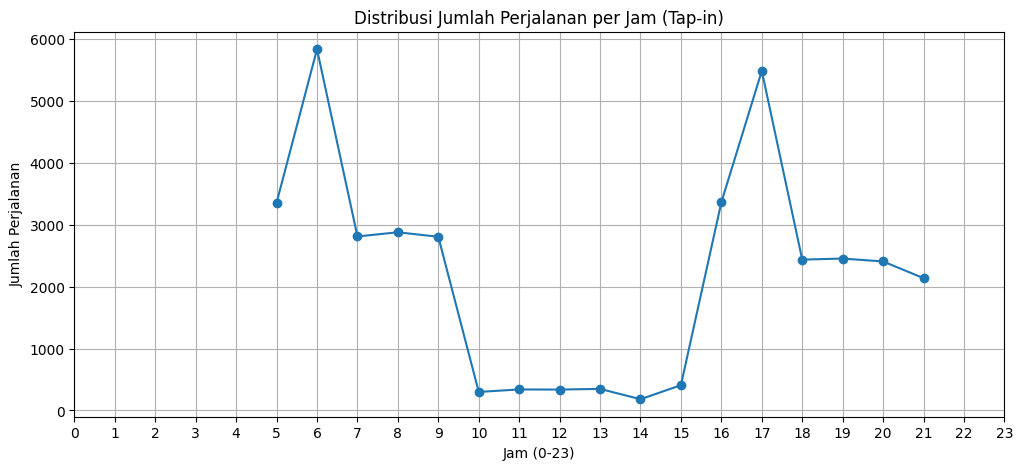

,is_peak,trips,avg_duration
0,False,9499,67.507099
1,True,27057,73.746796


In [9]:
# Jumlah perjalanan per jam (seluruh data)
hourly = df_clean.groupby('tapIn_hour').size().reset_index(name='trip_count')
plt.figure(figsize=(12,5))
plt.plot(hourly['tapIn_hour'], hourly['trip_count'], marker='o')
plt.title("Distribusi Jumlah Perjalanan per Jam (Tap-in)")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Perjalanan")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

# Perbandingan rata-rata durasi pada peak vs off-peak (hanya valid trips)
agg_peak = df_clean.loc[df_clean['valid_trip']].groupby('is_peak').agg(trips=('transID','count'), avg_duration=('trip_duration_min','mean')).reset_index()
display(agg_peak)


## 7. Kesimpulan dan Rekomendasi

### Kesimpulan

Berdasarkan hasil analisis yang telah dilakukan, diperoleh beberapa temuan utama sebagai berikut:

1. **Rata-rata durasi perjalanan penumpang Transjakarta adalah sekitar 72 menit**, dengan nilai median 71,8 menit. Hal ini menunjukkan bahwa sebagian besar perjalanan berlangsung selama **1 jam hingga 1 jam 15 menit**, yang tergolong wajar untuk rute antarkoridor di wilayah Jakarta.  
2. Terdapat variasi durasi yang cukup besar antar koridor. Beberapa koridor memiliki waktu tempuh yang lebih panjang dan tidak stabil, menandakan adanya potensi inefisiensi operasional.  
3. Aktivitas halte sangat terkonsentrasi di wilayah pusat kota seperti **Dukuh Atas, Harmoni, dan CSW**, sedangkan halte di area pinggiran menunjukkan aktivitas yang lebih rendah.  
4. Pola waktu keberangkatan memperlihatkan dua puncak utama, yaitu pada **jam 05.00–07.00** dan **16.00–18.00**, yang berkaitan erat dengan jam berangkat dan pulang kerja.  
5. Durasi perjalanan pada jam sibuk sedikit lebih lama dibandingkan dengan jam non-sibuk, mengindikasikan pengaruh dari kepadatan lalu lintas serta jumlah penumpang terhadap efisiensi waktu tempuh.

---

### Rekomendasi

Berdasarkan hasil temuan di atas, beberapa langkah yang dapat dipertimbangkan untuk meningkatkan efisiensi operasional Transjakarta antara lain:

- **Evaluasi koridor dengan rata-rata durasi tinggi dan variabilitas besar.**  
  Koridor-koridor tersebut perlu ditinjau lebih lanjut untuk mengidentifikasi penyebab keterlambatan, seperti kepadatan lalu lintas, panjang rute, atau banyaknya titik pemberhentian.

- **Optimalisasi halte dengan aktivitas rendah.**  
  Halte yang jarang digunakan dapat dievaluasi untuk penggabungan atau reposisi agar distribusi penumpang lebih merata dan operasional lebih efisien.

- **Penyesuaian frekuensi armada pada jam sibuk.**  
  Karena kepadatan tertinggi terjadi pada pagi dan sore hari, peningkatan jumlah bus di jam tersebut dapat membantu menurunkan waktu tunggu dan menjaga stabilitas waktu tempuh.

- **Integrasi data operasional dengan sistem GPS dan lalu lintas real-time.**  
  Integrasi ini dapat memberikan wawasan lebih akurat mengenai penyebab keterlambatan dan membantu pengambilan keputusan berbasis data dalam perencanaan rute dan jadwal.

Secara keseluruhan, hasil analisis ini menggambarkan kondisi operasional Transjakarta secara realistis dan dapat dijadikan acuan strategis untuk meningkatkan efisiensi layanan serta kenyamanan penumpang.


In [11]:
# Simpan tabel ringkasan untuk laporan
corridor_stats.to_csv("corridor_summary.csv", index=False)
stop_counts.to_csv("stop_activity.csv", index=False)
print("Saved: corridor_summary.csv, stop_activity.csv")


Saved: corridor_summary.csv, stop_activity.csv
